In [35]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./train.csv')

In [16]:
target = pd.read_csv('./challenge_output_data_training_file_nba_challenge.csv', sep=';')

**Data**   
Play-by-play datasets from the last 15 NBA seasons.  
Each game is described by 11 variables for every second of the game from the fist halft (1440 seconds, **1440x11 = 15840 columns**). These variables such as : "offensive rebound", "defensive rebound", "offensive foul", "defensive foul", "assist", "lost ball",  "steals", "bad pass","block", "miss" difference between the invited and home team. The scores/key indicators - represent the current score/key indicators differences.

The training set : 12576 NBA games.  
The test set : 4192 games.

In [17]:
print(df.shape)
print(target.shape)
df.head()

(12576, 15841)
(12576, 2)


,ID,score_1,offensive rebound_1,defensive rebound_1,offensive foul_1,defensive foul_1,assist_1,lost ball_1,steals_1,bad pass_1,...,offensive rebound_1440,defensive rebound_1440,offensive foul_1440,defensive foul_1440,assist_1440,lost ball_1440,steals_1440,bad pass_1440,block_1440,miss_1440
0,14186,-2,0,0,0,0,0,0,0,0,...,8,-4,2,0,-3,3,3,-2,1,9
1,13013,0,0,-1,0,0,0,0,0,0,...,1,5,0,0,1,0,0,1,-2,-1
2,7102,0,0,0,0,0,0,0,1,1,...,-1,-5,-5,0,0,5,5,-2,3,-5
3,7637,-2,0,0,0,0,0,0,0,0,...,2,8,1,0,-1,-1,2,2,-1,-1
4,12350,0,0,0,0,0,0,0,0,0,...,4,1,0,0,4,3,2,1,1,3


In [28]:
df_tot = pd.merge(df, target, on='ID')
# When the HT winner is the FT winner
same_mt_f = df_tot[((df_tot.score_1440 <= 0) & (df_tot.label == 0)) | ((df_tot.score_1440 >= 0) & (df_tot.label == 1))]
print('Probability that the half-time leader is the full-time winner %.3f' % (len(same_mt_f)/len(df_tot)))

Probability that the half-time leader is the full-time winner 0.743


In [66]:
print('Probability that the home team wins the game at FT %.3f' % (len(df_tot[df_tot.label == 0])/len(df_tot)))
print('Probability that the home team wins the game at HT %.3f' % (len(df_tot[df_tot.score_1440 <= 0])/len(df_tot)))

Probability that the home team wins the game at FT 0.564
Probability that the home team wins the game at HT 0.589


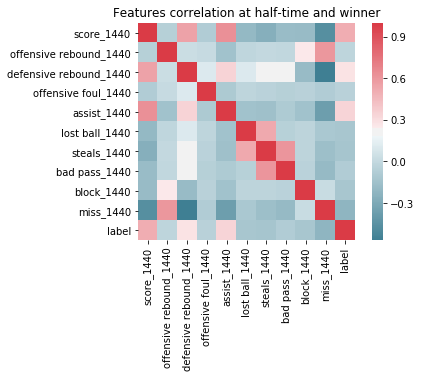

In [42]:
corr_ht = df_tot[[k for k in df_tot.columns if '1440' in k and 'defensive foul' not in k]+['label']].corr()
sns.heatmap(corr_ht, mask=np.zeros_like(corr_ht, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)
_ = plt.title('Features correlation at half-time and winner')

In [67]:
# Add new stats
ki = set([k.split('_')[0] for k in df_tot.columns if k not in ['label', 'ID']])
print('Current key indicators :', ki)

# Add total rebound
for k in range(1,1441):
    df_tot['rebound_%d' % k] = df_tot['offensive rebound_%d' % k] + df_tot['defensive rebound_%d' % k]

# Re-sort columns
def sorter(x):
    if x not in ['label', 'ID']:
        return int(x.split('_')[1])
    else:
        return 0
    
df_tot = df_tot[sorted(df_tot.columns, key=sorter)]
print('Added total (off+def) rebound stats')

Current key indicators : {'miss', 'offensive rebound', 'score', 'block', 'steals', 'offensive foul', 'assist', 'lost ball', 'bad pass', 'defensive rebound', 'rebound', 'defensive foul'}
Added total (off+def) rebound stats
